# Solid Planet Structure Modeling


### Assumptions


Planets are perfectly spherical.

Pressure and density only depend on distance to the center of the planet.

In this project, we'll use SI units.

### Hydrostatic Equilibrium

The relationship between pressure and gravity can be described with the following differential equation:

$\frac{dP(r)}{dr} = - \frac{G\rho(r)m(r)}{r^{2}}$ 

$G$ = gravitational constant

$r$ = distance from planet center

$\rho(r)$ = density

$m(r)$ = mass of planet interior

$m(r)$ can also be described in terms of density with the following equation:

$\frac{dm(r)}{dr} = 4\pi\rho(r)r^{2}$

### Density and Pressure Relation

https://iopscience.iop.org/article/10.1086/521346/pdf

The above paper by Seager et al describes an equation of state for solid planets of the form:

$\rho(P) = \rho_{0} + cP^{n}$



### Numerical Methods

We'll use the above differential equations to build pressure, density, and mass profiles for solid planets.

To solve the differential equations, we'll use a 4th order Runga-Kutta method:

$\frac{dy}{dx} =  f(x,y)$

$y(0) = y_{0}$

$y_{i+1} = y_{i} + \frac{1}{6}h(k_{1} + 2k_{2} + 2k_{3} + k_{4})$

where:

$k_{1} = f(x_{i}, y_{i})$

$k_{2} = f(x_{i} + \frac{1}{2}h, y_{i} + \frac{1}{2}k_{1}h)$

$k_{3} = f(x_{i} + \frac{1}{2}h, y_{i} + \frac{1}{2}k_{2}h)$

$k_{3} = f(x_{i} + h, y_{i} + k_{3}h)$

$h$ = delta step

In [24]:
# imports and constants

import matplotlib.pyplot as plt

G = 6.67e-11 # [m^3][kg^-1][s^-2]
r_Earth = 6.356e6 # [m]
m_Earth = 5.9723e24 # [kg]

In [7]:
# define rk4

def rk4(f, x, y, h, *argv):
    k1 = f(x, y, *argv)
    k2 = f(x + h/2, y + k1*h/2, *argv)
    k3 = f(x + h/2, y + k2*h/2, *argv)
    k4 = f(x + h, y + k3*h, *argv)
    
    return y + h*(k1 + 2*k2 + 2*k3 + k4)/6

In [8]:
# define equations

def dPdr(r, P, *argv):
    mass = argv[0]
    density = argv[1]
    return -G*mass*density/(r**2)

def dmdr(r, m, *argv):
    density = argv[0]
    return 4*np.pi*density*(r**2)

def density(P, rho0, c, n):
    return rho0 + c*(P**n)

### Test RK4

Test function:

$\frac{dy}{dx} = 2x$

The solution should be:

$y = x^{2}$

In [9]:
def f(x, *y):
    return 2*x

In [10]:
x = [0]
y = [0]

for i in range(1, 10):
    y_temp = rk4(f, x[-1], y[-1], 1)
    y.append(y_temp)
    x.append(i)
    
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0]


Results check out.

### Demonstration

Using values from the Seager, et al paper for iron (Fe)

$h = r\_Earth * 10^{-5} m$

$P_{0} = 10^{12} Pa$

In [29]:
# define step size to increase radius
h = 1e-5*r_Earth # [m]

# start at some small radius
radii = [h] # [m]

# constants for this example
c = 0.00349 # [kg][m^-3][Pa^-n]
n = 0.528 # dimensionless
rho0 = 8300 # [kg][m^-3]

# mass at our small initial radius
masses = [(4/3)*np.pi*(radii[-1]**3)] # [kg]

# pressure at center
pressures = [1e12] # [Pa]

# density at center
densities = [density(pressures[-1], rho0, c, n)] # [kg][m^-3]

In [30]:
# loop while the pressure stays positive
# we reach the edge of the planet when P = 0

while pressures[-1] > 0:
    # update masses
    m_temp = rk4(dmdr, radii[-1], masses[-1], h, densities[-1])
    masses.append(m_temp)
    
    # update pressures
    P_temp = rk4(dPdr, radii[-1], pressures[-1], h, masses[-1], densities[-1])
    pressures.append(P_temp)
    
    # update densities
    rho_temp = density(pressures[-1], rho0, c, n)
    densities.append(rho_temp)
    
    # update radii
    radii.append(radii[-1]+h)

In [35]:
print("Radius = ", radii[-1]/r_Earth, " Earth radii")
print("Mass   = ", masses[-1]/m_Earth, " Earth masses")

Radius =  0.9830099999984216  Earth radii
Mass   =  2.084226535952675  Earth masses


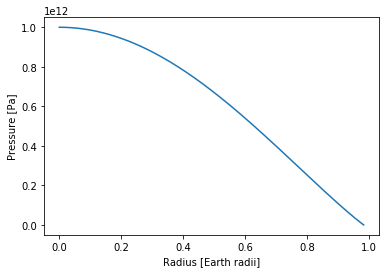

In [42]:
plt.plot(np.array(radii)/r_Earth, pressures)
plt.xlabel("Radius [Earth radii]")
plt.ylabel("Pressure [Pa]")
plt.show()

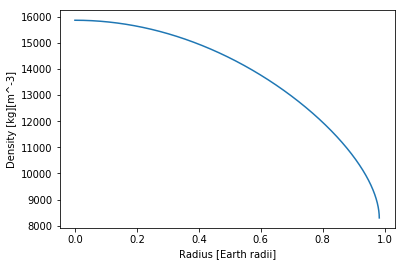

In [44]:
plt.plot(np.array(radii)/r_Earth, densities)
plt.xlabel("Radius [Earth radii]")
plt.ylabel("Density [kg][m^-3]")
plt.show()